# Task
Build a bank queue management simulation in Python, including core logic, entity implementations, random processes, and performance monitoring, with potential C++ integration for advanced performance, and analyze and visualize the simulation results.

## Project Requirements and Design

### Subtask:
Define the scope, objectives, and high-level design of the bank queue management simulation. This includes identifying key entities (customers, tellers, queues), their behaviors, and the events that drive the simulation. Also, outline the simulation approach (e.g., discrete-event simulation) and the metrics to be collected.


### 1. Primary Objectives of the Simulation

The main objectives of this bank queue management simulation are to:

*   **Optimize resource allocation:** Determine the optimal number of tellers needed to efficiently serve customers while minimizing operational costs.
*   **Improve customer experience:** Reduce average customer waiting times and overall time spent in the bank.
*   **Evaluate system performance:** Analyze key metrics to identify bottlenecks and areas for improvement in the bank's queuing system.
*   **Predict system behavior:** Understand how changes in customer arrival rates or service times impact queue lengths and customer satisfaction.
*   **Support decision-making:** Provide data-driven insights for strategic planning related to staffing, layout, and service processes.

### 2. Key Entities, Attributes, and Behaviors

#### Customers
*   **Attributes:**
    *   `arrival_time`: The time a customer enters the bank.
    *   `service_required_time`: The duration of service needed by the customer.
    *   `start_service_time`: The time a customer begins receiving service from a teller.
    *   `end_service_time`: The time a customer finishes receiving service.
    *   `waiting_time`: The total time a customer spends in a queue.
    *   `system_time`: The total time a customer spends in the bank (waiting + service).
*   **Behaviors:**
    *   `Arrive`: Enters the bank at a specific time.
    *   `Join_Queue`: Joins the shortest available queue.
    *   `Wait`: Waits in the queue for an available teller.
    *   `Get_Service`: Receives service from a teller.
    *   `Leave`: Exits the bank after service is complete.

#### Tellers
*   **Attributes:**
    *   `id`: Unique identifier for each teller.
    *   `status`: `busy` or `idle`.
    *   `service_rate`: The speed at which a teller provides service (can be individual or average).
    *   `customers_served_count`: Total number of customers served by this teller.
*   **Behaviors:**
    *   `Serve_Customer`: Provides service to a customer.
    *   `Become_Idle`: Changes status to idle after finishing service.
    *   `Become_Busy`: Changes status to busy when starting service.

#### Queues
*   **Attributes:**
    *   `id`: Unique identifier for each queue.
    *   `capacity`: Maximum number of customers the queue can hold (potentially infinite).
    *   `current_length`: The number of customers currently in the queue.
    *   `max_length`: The maximum length the queue reached during the simulation.
*   **Behaviors:**
    *   `Add_Customer`: A customer joins the queue.
    *   `Remove_Customer`: A customer leaves the queue to be served.
    *   `Report_Length`: Provides current length for customer queue selection.

### 3. Critical Events

The simulation will be driven by a sequence of discrete events. These events change the state of the system and trigger subsequent actions. Key events include:

*   **Customer Arrival:** A new customer enters the bank and is added to the system. This event triggers the customer to choose and join a queue.
*   **Service Start:** A customer at the front of a queue begins receiving service from an available teller. This event changes the teller's status to busy.
*   **Service End:** A teller finishes serving a customer. This event releases the teller (making them idle) and the customer leaves the system. It may also trigger a new service start if there are customers waiting in that teller's queue.
*   **Simulation Start/End:** Events marking the beginning and end of the overall simulation run.

### 4. Simulation Approach

This simulation will employ a **Discrete-Event Simulation (DES)** approach. This method is highly suitable for this problem due to the following reasons:

*   **Event-Driven:** The system's state changes only at discrete points in time when specific events occur (e.g., customer arrival, service start, service end), rather than continuously. This aligns perfectly with the nature of queuing systems.
*   **Accuracy:** DES allows for a precise modeling of complex interactions and dependencies between entities and events, providing accurate insights into system performance.
*   **Flexibility:** It can easily accommodate stochastic elements (e.g., random arrival times, variable service times) and various queuing disciplines.
*   **Resource Management:** It enables effective tracking of resource (teller) utilization and customer flow through different states (waiting, being served, leaving).

### 5. Key Performance Metrics (KPMs)

To evaluate the performance of the bank queue management system, the following key performance metrics will be collected and analyzed:

#### Customer Experience Metrics:
*   **Average Waiting Time:** The average time customers spend in the queue before receiving service.
*   **Maximum Waiting Time:** The longest time any customer waited in a queue.
*   **Average System Time:** The average total time customers spend in the bank (waiting time + service time).
*   **Customers Served Count:** Total number of customers successfully served during the simulation.
*   **Customers Left Unserved (Balking/Reneging):** If applicable, count of customers who leave without service due to long queues or waiting times.

#### Resource Utilization Metrics:
*   **Teller Utilization:** The percentage of time each teller is busy serving customers.
*   **Average Teller Idle Time:** The average time tellers are idle.

#### Queue Performance Metrics:
*   **Average Queue Length:** The average number of customers waiting in each queue.
*   **Maximum Queue Length:** The peak number of customers observed in any queue at any point.
*   **Queue Throughput:** The rate at which customers are processed through the queues.

#### Overall System Efficiency:
*   **Service Level:** The proportion of customers served within a predefined target waiting time (e.g., 80% of customers wait less than 5 minutes).

### 5. Key Performance Metrics (KPMs)

To evaluate the performance of the bank queue management system, the following key performance metrics will be collected and analyzed:

#### Customer Experience Metrics:
*   **Average Waiting Time:** The average time customers spend in the queue before receiving service.
*   **Maximum Waiting Time:** The longest time any customer waited in a queue.
*   **Average System Time:** The average total time customers spend in the bank (waiting time + service time).
*   **Customers Served Count:** Total number of customers successfully served during the simulation.
*   **Customers Left Unserved (Balking/Reneging):** If applicable, count of customers who leave without service due to long queues or waiting times.

#### Resource Utilization Metrics:
*   **Teller Utilization:** The percentage of time each teller is busy serving customers.
*   **Average Teller Idle Time:** The average time tellers are idle.

#### Queue Performance Metrics:
*   **Average Queue Length:** The average number of customers waiting in each queue.
*   **Maximum Queue Length:** The peak number of customers observed in any queue at any point.
*   **Queue Throughput:** The rate at which customers are processed through the queues.

#### Overall System Efficiency:
*   **Service Level:** The proportion of customers served within a predefined target waiting time (e.g., 80% of customers wait less than 5 minutes).

## Core Simulation Logic (Python)

### Subtask:
Implement the fundamental discrete-event simulation framework in Python. This involves creating an event scheduler, managing the simulation clock, and developing mechanisms for processing different types of events (e.g., customer arrival, service start, service end).


**Reasoning**:
To implement the fundamental discrete-event simulation framework, I will define the `Event` class, `EventQueue` class, and the main `Simulation` class with their specified attributes and methods, including placeholder event handlers.



In [ ]:
import heapq

class Event:
    """Represents a single event in the simulation."""
    def __init__(self, time, type, details=None):
        self.time = time
        self.type = type
        self.details = details if details is not None else {}

    def __lt__(self, other):
        """Comparison for heapq to order events by time."""
        return self.time < other.time

    def __repr__(self):
        return f"Event(time={self.time}, type='{self.type}', details={self.details})"


class EventQueue:
    """Manages a priority queue of events, ordered by time."""
    def __init__(self):
        self._events = []

    def add_event(self, event):
        """Adds an event to the queue."""
        heapq.heappush(self._events, event)

    def get_next_event(self):
        """Removes and returns the earliest event."""
        if not self.is_empty():
            return heapq.heappop(self._events)
        return None

    def is_empty(self):
        """Checks if the event queue is empty."""
        return len(self._events) == 0

    def __len__(self):
        return len(self._events)


class Simulation:
    """Orchestrates the discrete-event simulation."""
    def __init__(self, simulation_duration):
        self.current_time = 0.0
        self.event_queue = EventQueue()
        self.simulation_duration = simulation_duration
        self.total_customers_served = 0
        self.total_wait_time = 0.0

    def _handle_customer_arrival(self, event):
        print(f"[{self.current_time:.2f}] Customer arrival: {event.details.get('customer_id')}")
        # In subsequent steps, we'll add logic to queue the customer
        # and potentially schedule a service_start event.

    def _handle_service_start(self, event):
        print(f"[{self.current_time:.2f}] Service start for customer: {event.details.get('customer_id')} by teller: {event.details.get('teller_id')}")
        # In subsequent steps, we'll add logic to mark teller as busy
        # and schedule a service_end event.

    def _handle_service_end(self, event):
        print(f"[{self.current_time:.2f}] Service end for customer: {event.details.get('customer_id')} by teller: {event.details.get('teller_id')}")
        # In subsequent steps, we'll add logic to free up the teller,
        # update statistics, and potentially schedule another service_start event
        # if there are waiting customers.

    def _handle_simulation_end(self, event):
        print(f"[{self.current_time:.2f}] Simulation end.")

    def run(self):
        """Runs the simulation until the event queue is empty or duration is met."""
        print("\n--- Simulation Started ---")

        # Initial event: first customer arrival (e.g., at time 0)
        self.event_queue.add_event(Event(time=0, type='customer_arrival', details={'customer_id': 1}))
        # Schedule a simulation end event
        self.event_queue.add_event(Event(time=self.simulation_duration, type='simulation_end'))

        while not self.event_queue.is_empty() and self.current_time < self.simulation_duration:
            next_event = self.event_queue.get_next_event()

            # If an event is scheduled past the simulation_duration, ignore it unless it's the simulation_end event itself.
            if next_event.time > self.simulation_duration and next_event.type != 'simulation_end':
                continue

            self.current_time = next_event.time

            if next_event.type == 'customer_arrival':
                self._handle_customer_arrival(next_event)
            elif next_event.type == 'service_start':
                self._handle_service_start(next_event)
            elif next_event.type == 'service_end':
                self._handle_service_end(next_event)
            elif next_event.type == 'simulation_end':
                self._handle_simulation_end(next_event)
                break # End the simulation loop once the simulation_end event is processed
            else:
                print(f"[{self.current_time:.2f}] Unknown event type: {next_event.type}")

        print("--- Simulation Finished ---")

# Example usage (will be removed or modified in later steps once integrated)
# simulation = Simulation(simulation_duration=10)
# simulation.run()

## Bank Entities Implementation (Python)

### Subtask:
Develop Python classes for the core bank entities: `Customer` (with attributes like arrival time, service time, waiting time), `Teller` (with attributes like busy status, service capacity), and `Queue` (to manage waiting customers). Define their interactions and state changes within the simulation.


**Reasoning**:
The subtask requires developing Python classes for Customer, Teller, and Queue with specific attributes and methods. I will create these classes as instructed.



In [ ]:
import collections

class Customer:
    """Represents a customer in the bank simulation."""
    def __init__(self, customer_id, arrival_time, service_required_time):
        self.customer_id = customer_id
        self.arrival_time = arrival_time
        self.service_required_time = service_required_time
        self.start_service_time = None
        self.end_service_time = None
        self.waiting_time = 0.0
        self.system_time = 0.0

    def __repr__(self):
        return f"Customer(id={self.customer_id}, arrival={self.arrival_time:.2f}, service_req={self.service_required_time:.2f})"


class Teller:
    """Represents a teller in the bank simulation."""
    def __init__(self, teller_id):
        self.teller_id = teller_id
        self.is_busy = False
        self.customers_served_count = 0

    def start_service(self):
        """Sets the teller's status to busy."""
        self.is_busy = True

    def end_service(self):
        """Sets the teller's status to idle and increments served customer count."""
        self.is_busy = False
        self.customers_served_count += 1

    def __repr__(self):
        return f"Teller(id={self.teller_id}, busy={self.is_busy}, served={self.customers_served_count})"


class Queue:
    """Manages a queue of customers using a deque."""
    def __init__(self, queue_id):
        self.queue_id = queue_id
        self._customers = collections.deque()

    def add_customer(self, customer):
        """Adds a customer to the end of the queue."""
        self._customers.append(customer)

    def remove_customer(self):
        """Removes and returns the customer from the front of the queue."""
        if not self.is_empty():
            return self._customers.popleft()
        return None

    def is_empty(self):
        """Checks if the queue is empty."""
        return len(self._customers) == 0

    def get_length(self):
        """Returns the current number of customers in the queue."""
        return len(self._customers)

    def peek(self):
        """Returns the customer at the front of the queue without removing it."""
        if not self.is_empty():
            return self._customers[0]
        return None

    def __len__(self):
        return self.get_length()

    def __repr__(self):
        return f"Queue(id={self.queue_id}, length={self.get_length()})"

print("Customer, Teller, and Queue classes defined.")


Customer, Teller, and Queue classes defined.


## Random Processes and Distributions (Python)

### Subtask:
Implement functions in Python to simulate random processes crucial to the simulation. This includes generating customer inter-arrival times and teller service times using appropriate probability distributions (e.g., exponential for arrivals, normal/uniform for service times).


**Reasoning**:
To implement the functions for generating random inter-arrival times and service times, I will use the `random` module and define the two specified functions, `generate_inter_arrival_time` and `generate_service_time`, with the required distributions and parameters. I will also add print statements to test them.



In [ ]:
import random

def generate_inter_arrival_time(mean_inter_arrival_time):
    """
    Generates a customer inter-arrival time using an exponential distribution.
    The rate parameter (lambda) for expovariate is 1/mean.
    """
    if mean_inter_arrival_time <= 0:
        raise ValueError("Mean inter-arrival time must be positive.")
    return random.expovariate(1 / mean_inter_arrival_time)

def generate_service_time(mean_service_time, service_time_std_dev=None):
    """
    Generates a service time. Uses a normal distribution if std_dev is provided,
    otherwise uses a uniform distribution (approximated based on mean).
    Ensures service time is non-negative.
    """
    if mean_service_time <= 0:
        raise ValueError("Mean service time must be positive.")

    if service_time_std_dev is not None and service_time_std_dev >= 0:
        # Use normal distribution
        service_time = random.gauss(mean_service_time, service_time_std_dev)
        # Ensure service time is not negative, minimum of a small positive number
        return max(0.01, service_time)
    else:
        # Use uniform distribution (simple approximation: mean -/+ 50%)
        # A better uniform distribution would require min/max bounds.
        # For now, let's assume a range around the mean.
        lower_bound = max(0.01, mean_service_time * 0.5)
        upper_bound = mean_service_time * 1.5
        return random.uniform(lower_bound, upper_bound)

# --- Test the functions ---
print("\n--- Testing random process generation ---")

# Test inter-arrival times
mean_arrival = 5.0 # customers per unit time
print(f"Generating 5 inter-arrival times with mean {mean_arrival}:")
for _ in range(5):
    print(f"  {generate_inter_arrival_time(mean_arrival):.2f}")

# Test service times (Normal distribution)
mean_service_normal = 8.0
std_dev_service_normal = 2.0
print(f"\nGenerating 5 service times (Normal) with mean {mean_service_normal}, std_dev {std_dev_service_normal}:")
for _ in range(5):
    print(f"  {generate_service_time(mean_service_normal, std_dev_service_normal):.2f}")

# Test service times (Uniform distribution)
mean_service_uniform = 7.0
print(f"\nGenerating 5 service times (Uniform) with mean {mean_service_uniform}:")
for _ in range(5):
    print(f"  {generate_service_time(mean_service_uniform):.2f}")



--- Testing random process generation ---
Generating 5 inter-arrival times with mean 5.0:
  4.36
  0.05
  1.24
  0.80
  0.42

Generating 5 service times (Normal) with mean 8.0, std_dev 2.0:
  9.12
  8.51
  7.20
  8.92
  8.51

Generating 5 service times (Uniform) with mean 7.0:
  6.94
  9.05
  8.23
  9.47
  3.74


## Performance Monitoring and Data Collection (Python)

### Subtask:
Integrate mechanisms into the Python simulation to collect critical performance metrics, including customer waiting times, queue lengths over time, teller utilization, and the number of customers served. Store this data for subsequent analysis.


**Reasoning**:
To integrate performance monitoring and data collection as per the instructions, I will modify the `Simulation` class. This involves initializing new lists in `__init__` to store metrics, and updating the event handler methods (`_handle_customer_arrival`, `_handle_service_start`, `_handle_service_end`) to record the relevant data when events occur. I will also include the `Customer`, `Teller`, and `Queue` classes in the same code block to ensure they are available for the `Simulation` class to interact with, as these classes define the attributes and methods needed for data collection (e.g., `customer.start_service_time`, `teller.is_busy`, `queue.get_length`).



In [ ]:
import heapq
import collections
import random # Needed for potential future use, already imported in previous step

# Re-defining Customer, Teller, Queue classes to ensure they are available
# and can be referenced by the Simulation class within this block.
class Customer:
    """Represents a customer in the bank simulation."""
    def __init__(self, customer_id, arrival_time, service_required_time):
        self.customer_id = customer_id
        self.arrival_time = arrival_time
        self.service_required_time = service_required_time
        self.start_service_time = None
        self.end_service_time = None
        self.waiting_time = 0.0
        self.system_time = 0.0

    def __repr__(self):
        return f"Customer(id={self.customer_id}, arrival={self.arrival_time:.2f}, service_req={self.service_required_time:.2f})"


class Teller:
    """Represents a teller in the bank simulation."""
    def __init__(self, teller_id):
        self.teller_id = teller_id
        self.is_busy = False
        self.customers_served_count = 0
        self.total_busy_time = 0.0 # Added for utilization calculation

    def start_service(self):
        """Sets the teller's status to busy."""
        self.is_busy = True

    def end_service(self):
        """Sets the teller's status to idle and increments served customer count."""
        self.is_busy = False
        self.customers_served_count += 1

    def __repr__(self):
        return f"Teller(id={self.teller_id}, busy={self.is_busy}, served={self.customers_served_count})"


class Queue:
    """Manages a queue of customers using a deque."""
    def __init__(self, queue_id):
        self.queue_id = queue_id
        self._customers = collections.deque()
        self.max_length = 0 # Added for queue metrics

    def add_customer(self, customer):
        """Adds a customer to the end of the queue."""
        self._customers.append(customer)
        if len(self._customers) > self.max_length:
            self.max_length = len(self._customers)

    def remove_customer(self):
        """Removes and returns the customer from the front of the queue."""
        if not self.is_empty():
            return self._customers.popleft()
        return None

    def is_empty(self):
        """Checks if the queue is empty."""
        return len(self._customers) == 0

    def get_length(self):
        """Returns the current number of customers in the queue."""
        return len(self._customers)

    def peek(self):
        """Returns the customer at the front of the queue without removing it."""
        if not self.is_empty():
            return self._customers[0]
        return None

    def __len__(self):
        return self.get_length()

    def __repr__(self):
        return f"Queue(id={self.queue_id}, length={self.get_length()})"


class Event:
    """Represents a single event in the simulation."""
    def __init__(self, time, type, details=None):
        self.time = time
        self.type = type
        self.details = details if details is not None else {}

    def __lt__(self, other):
        """Comparison for heapq to order events by time."""
        return self.time < other.time

    def __repr__(self):
        return f"Event(time={self.time}, type='{self.type}', details={self.details})"


class EventQueue:
    """Manages a priority queue of events, ordered by time."""
    def __init__(self):
        self._events = []

    def add_event(self, event):
        """Adds an event to the queue."""
        heapq.heappush(self._events, event)

    def get_next_event(self):
        """Removes and returns the earliest event."""
        if not self.is_empty():
            return heapq.heappop(self._events)
        return None

    def is_empty(self):
        """Checks if the event queue is empty."""
        return len(self._events) == 0

    def __len__(self):
        return len(self._events)


class Simulation:
    """Orchestrates the discrete-event simulation."""
    def __init__(self, simulation_duration, num_tellers=1, num_queues=1):
        self.current_time = 0.0
        self.event_queue = EventQueue()
        self.simulation_duration = simulation_duration

        # Initialize entities (simplified for this step, full logic in next)
        self.customers = {}
        self.tellers = [Teller(i) for i in range(num_tellers)]
        self.queues = [Queue(i) for i in range(num_queues)]

        # Metric collection lists
        self.completed_customers = []
        self.queue_length_history = [] # Stores (time, [queue_1_len, queue_2_len, ...])
        self.teller_status_history = [] # Stores (time, teller_id, status)

        # For overall statistics (will be moved to a StatsCollector later)
        self.total_customers_served = 0
        self.total_wait_time = 0.0

    def _record_queue_lengths(self):
        """Records the current length of all queues."""
        self.queue_length_history.append((self.current_time, [q.get_length() for q in self.queues]))

    def _handle_customer_arrival(self, event):
        print(f"[{self.current_time:.2f}] Customer arrival: {event.details.get('customer_id')}")
        customer_id = event.details['customer_id']
        arrival_time = self.current_time
        # For now, create a dummy customer. Service time will be properly generated later.
        service_required_time = 5.0 # Placeholder
        customer = Customer(customer_id, arrival_time, service_required_time)
        self.customers[customer_id] = customer

        # In subsequent steps, we'll add logic to queue the customer
        # For now, let's just log the current queue state as if a customer joined.
        # This assumes customer joins a queue *before* this log occurs.
        # For accurate logging, a customer would need to join a queue here.
        # For demonstration of logging, assume queue has 1 customer if it's the first event.
        if self.queues:
            # Temporarily add customer to a queue to record length, then remove it if not actually served
            # This is a temporary measure for logging in this step.
            # The full queuing logic comes later.
            self.queues[0].add_customer(customer) # Assume customer joins queue 0 for now
            self._record_queue_lengths()
            self.queues[0].remove_customer() # Remove to keep queue truly empty until service starts
        else:
            self._record_queue_lengths() # Record empty if no queues


    def _handle_service_start(self, event):
        customer_id = event.details['customer_id']
        teller_id = event.details['teller_id']
        print(f"[{self.current_time:.2f}] Service start for customer: {customer_id} by teller: {teller_id}")

        customer = self.customers.get(customer_id)
        teller = next((t for t in self.tellers if t.teller_id == teller_id), None)

        if customer and teller:
            # Record the current time and the teller's new 'busy' status
            teller.start_service()
            self.teller_status_history.append((self.current_time, teller.teller_id, 'busy'))
            # Update the customer's `start_service_time`
            customer.start_service_time = self.current_time

        # Record the current time and the length of each queue
        # This assumes a customer just moved from queue to service
        self._record_queue_lengths()

    def _handle_service_end(self, event):
        customer_id = event.details['customer_id']
        teller_id = event.details['teller_id']
        print(f"[{self.current_time:.2f}] Service end for customer: {customer_id} by teller: {teller_id}")

        customer = self.customers.get(customer_id)
        teller = next((t for t in self.tellers if t.teller_id == teller_id), None)

        if customer and teller:
            # Record the current time and the teller's new 'idle' status
            teller.end_service()
            self.teller_status_history.append((self.current_time, teller.teller_id, 'idle'))

            # Update the customer's `end_service_time`, `waiting_time`, and `system_time`
            customer.end_service_time = self.current_time
            if customer.start_service_time is not None:
                customer.waiting_time = customer.start_service_time - customer.arrival_time
            else:
                customer.waiting_time = 0.0 # Should not happen in a correct simulation
            customer.system_time = customer.end_service_time - customer.arrival_time

            # Add the completed `Customer` object to `self.completed_customers`
            self.completed_customers.append(customer)

        # Record the current time and the length of each queue
        self._record_queue_lengths()

    def _handle_simulation_end(self, event):
        print(f"[{self.current_time:.2f}] Simulation end.")

    def run(self):
        """Runs the simulation until the event queue is empty or duration is met."""
        print("\n--- Simulation Started ---")

        # Initial events for demonstration of metric collection
        # Schedule a few customer arrivals, service starts, and service ends
        self.event_queue.add_event(Event(time=0, type='customer_arrival', details={'customer_id': 1}))
        self.event_queue.add_event(Event(time=1, type='customer_arrival', details={'customer_id': 2}))
        self.event_queue.add_event(Event(time=2, type='service_start', details={'customer_id': 1, 'teller_id': 0}))
        self.event_queue.add_event(Event(time=7, type='service_end', details={'customer_id': 1, 'teller_id': 0}))
        self.event_queue.add_event(Event(time=8, type='service_start', details={'customer_id': 2, 'teller_id': 0}))
        self.event_queue.add_event(Event(time=13, type='service_end', details={'customer_id': 2, 'teller_id': 0}))

        # Schedule a simulation end event
        self.event_queue.add_event(Event(time=self.simulation_duration, type='simulation_end'))

        while not self.event_queue.is_empty() and self.current_time < self.simulation_duration:
            next_event = self.event_queue.get_next_event()

            # If an event is scheduled past the simulation_duration, ignore it unless it's the simulation_end event itself.
            if next_event.time > self.simulation_duration and next_event.type != 'simulation_end':
                continue

            self.current_time = next_event.time

            if next_event.type == 'customer_arrival':
                self._handle_customer_arrival(next_event)
            elif next_event.type == 'service_start':
                self._handle_service_start(next_event)
            elif next_event.type == 'service_end':
                self._handle_service_end(next_event)
            elif next_event.type == 'simulation_end':
                self._handle_simulation_end(next_event)
                break # End the simulation loop once the simulation_end event is processed
            else:
                print(f"[{self.current_time:.2f}] Unknown event type: {next_event.type}")

        print("--- Simulation Finished ---")
        print("\n--- Collected Metrics (Example) ---")
        print("Completed Customers Count:", len(self.completed_customers))
        if self.completed_customers:
            for cust in self.completed_customers:
                print(f"  Customer {cust.customer_id}: Waiting Time={cust.waiting_time:.2f}, System Time={cust.system_time:.2f}")
        print("\nQueue Length History:", self.queue_length_history)
        print("\nTeller Status History:", self.teller_status_history)

# Example usage (testing the data collection)
print("Running simulation to demonstrate metric collection...")
simulation = Simulation(simulation_duration=15, num_tellers=1, num_queues=1)
simulation.run()


Running simulation to demonstrate metric collection...

--- Simulation Started ---
[0.00] Customer arrival: 1
[1.00] Customer arrival: 2
[2.00] Service start for customer: 1 by teller: 0
[7.00] Service end for customer: 1 by teller: 0
[8.00] Service start for customer: 2 by teller: 0
[13.00] Service end for customer: 2 by teller: 0
[15.00] Simulation end.
--- Simulation Finished ---

--- Collected Metrics (Example) ---
Completed Customers Count: 2
  Customer 1: Waiting Time=2.00, System Time=7.00
  Customer 2: Waiting Time=7.00, System Time=12.00

Queue Length History: [(0, [1]), (1, [1]), (2, [0]), (7, [0]), (8, [0]), (13, [0])]

Teller Status History: [(2, 0, 'busy'), (7, 0, 'idle'), (8, 0, 'busy'), (13, 0, 'idle')]


## Basic Simulation Run and Validation (Python)

### Subtask:
Execute preliminary simulations using the Python implementation with various input parameters. Validate the simulation's basic functionality and logical flow to ensure it behaves as expected under different scenarios.


**Reasoning**:
To implement the subtask, I need to modify the `Simulation` class's methods (`__init__`, `_handle_customer_arrival`, `_handle_service_start`, `_handle_service_end`, and `run`) according to the provided instructions. This includes incorporating random process generation for arrivals and service times, managing customer flow through queues and tellers, and collecting comprehensive performance metrics for validation.



In [ ]:
import heapq
import collections
import random

# Re-defining Customer, Teller, Queue classes to ensure they are available
# and can be referenced by the Simulation class within this block.
class Customer:
    """Represents a customer in the bank simulation."""
    def __init__(self, customer_id, arrival_time, service_required_time):
        self.customer_id = customer_id
        self.arrival_time = arrival_time
        self.service_required_time = service_required_time
        self.start_service_time = None
        self.end_service_time = None
        self.waiting_time = 0.0
        self.system_time = 0.0

    def __repr__(self):
        return f"Customer(id={self.customer_id}, arrival={self.arrival_time:.2f}, service_req={self.service_required_time:.2f})"


class Teller:
    """Represents a teller in the bank simulation."""
    def __init__(self, teller_id):
        self.teller_id = teller_id
        self.is_busy = False
        self.customers_served_count = 0
        self.total_busy_time = 0.0 # Added for utilization calculation
        self.current_customer = None # Added to keep track of who is being served

    def start_service(self, customer):
        """Sets the teller's status to busy and assigns a customer."""
        self.is_busy = True
        self.current_customer = customer

    def end_service(self):
        """Sets the teller's status to idle and increments served customer count."""
        self.is_busy = False
        self.customers_served_count += 1
        self.current_customer = None

    def __repr__(self):
        return f"Teller(id={self.teller_id}, busy={self.is_busy}, served={self.customers_served_count})"


class Queue:
    """Manages a queue of customers using a deque."""
    def __init__(self, queue_id):
        self.queue_id = queue_id
        self._customers = collections.deque()
        self.max_length = 0 # Added for queue metrics

    def add_customer(self, customer):
        """Adds a customer to the end of the queue."""
        self._customers.append(customer)
        if len(self._customers) > self.max_length:
            self.max_length = len(self._customers)

    def remove_customer(self):
        """Removes and returns the customer from the front of the queue."""
        if not self.is_empty():
            return self._customers.popleft()
        return None

    def is_empty(self):
        """Checks if the queue is empty."""
        return len(self._customers) == 0

    def get_length(self):
        """Returns the current number of customers in the queue."""
        return len(self._customers)

    def peek(self):
        """Returns the customer at the front of the queue without removing it."""
        if not self.is_empty():
            return self._customers[0]
        return None

    def __len__(self):
        return self.get_length()

    def __repr__(self):
        return f"Queue(id={self.queue_id}, length={self.get_length()})"


class Event:
    """Represents a single event in the simulation."""
    def __init__(self, time, type, details=None):
        self.time = time
        self.type = type
        self.details = details if details is not None else {}

    def __lt__(self, other):
        """Comparison for heapq to order events by time."""
        return self.time < other.time

    def __repr__(self):
        return f"Event(time={self.time}, type='{self.type}', details={self.details})"


class EventQueue:
    """Manages a priority queue of events, ordered by time."""
    def __init__(self):
        self._events = []

    def add_event(self, event):
        """Adds an event to the queue."""
        heapq.heappush(self._events, event)

    def get_next_event(self):
        """Removes and returns the earliest event."""
        if not self.is_empty():
            return heapq.heappop(self._events)
        return None

    def is_empty(self):
        """Checks if the event queue is empty."""
        return len(self._events) == 0

    def __len__(self):
        return len(self._events)

def generate_inter_arrival_time(mean_inter_arrival_time):
    """
    Generates a customer inter-arrival time using an exponential distribution.
    The rate parameter (lambda) for expovariate is 1/mean.
    """
    if mean_inter_arrival_time <= 0:
        raise ValueError("Mean inter-arrival time must be positive.")
    return random.expovariate(1 / mean_inter_arrival_time)

def generate_service_time(mean_service_time, service_time_std_dev=None):
    """
    Generates a service time. Uses a normal distribution if std_dev is provided,
    otherwise uses a uniform distribution (approximated based on mean).
    Ensures service time is non-negative.
    """
    if mean_service_time <= 0:
        raise ValueError("Mean service time must be positive.")

    if service_time_std_dev is not None and service_time_std_dev >= 0:
        # Use normal distribution
        service_time = random.gauss(mean_service_time, service_time_std_dev)
        # Ensure service time is not negative, minimum of a small positive number
        return max(0.01, service_time)
    else:
        # Use uniform distribution (simple approximation: mean -/+ 50%)
        # A better uniform distribution would require min/max bounds.
        # For now, let's assume a range around the mean.
        lower_bound = max(0.01, mean_service_time * 0.5)
        upper_bound = mean_service_time * 1.5
        return random.uniform(lower_bound, upper_bound)


class Simulation:
    """Orchestrates the discrete-event simulation."""
    def __init__(self, simulation_duration, num_tellers=1, num_queues=1,
                 mean_inter_arrival_time=5.0, mean_service_time=8.0, service_time_std_dev=2.0):
        self.current_time = 0.0
        self.event_queue = EventQueue()
        self.simulation_duration = simulation_duration

        self.num_tellers = num_tellers
        self.num_queues = num_queues

        # Simulation parameters
        self.mean_inter_arrival_time = mean_inter_arrival_time
        self.mean_service_time = mean_service_time
        self.service_time_std_dev = service_time_std_dev

        # Entities
        self.next_customer_id = 1
        self.customers = {} # Stores all customer objects by ID for easy lookup
        self.all_customers = [] # Stores all customer objects created during simulation
        self.tellers = [Teller(i) for i in range(num_tellers)]
        self.queues = [Queue(i) for i in range(num_queues)]

        # Metric collection lists
        self.completed_customers = []
        self.queue_length_history = [] # Stores (time, [queue_1_len, queue_2_len, ...])
        self.teller_status_history = [] # Stores (time, teller_id, status)

    def _record_queue_lengths(self):
        """Records the current length of all queues."""
        self.queue_length_history.append((self.current_time, [q.get_length() for q in self.queues]))

    def _schedule_service_if_possible(self):
        """Checks for idle tellers and waiting customers to schedule service_start events."""
        for teller in self.tellers:
            if not teller.is_busy:
                # Find the shortest queue with waiting customers
                shortest_queue = None
                min_queue_length = float('inf')
                for q in self.queues:
                    if not q.is_empty() and q.get_length() < min_queue_length:
                        shortest_queue = q
                        min_queue_length = q.get_length()

                if shortest_queue is not None:
                    customer = shortest_queue.remove_customer()
                    self.event_queue.add_event(Event(
                        time=self.current_time,
                        type='service_start',
                        details={'customer_id': customer.customer_id, 'teller_id': teller.teller_id}
                    ))
                    # Only one service can be started per teller per check
                    return


    def _handle_customer_arrival(self, event):
        print(f"[{self.current_time:.2f}] Customer {event.details.get('customer_id')} arrived.")

        customer_id = event.details['customer_id']
        arrival_time = self.current_time
        service_required_time = generate_service_time(self.mean_service_time, self.service_time_std_dev)

        customer = Customer(customer_id, arrival_time, service_required_time)
        self.customers[customer_id] = customer
        self.all_customers.append(customer)

        # Find the shortest queue and add the customer
        shortest_queue = min(self.queues, key=lambda q: q.get_length())
        shortest_queue.add_customer(customer)

        self._record_queue_lengths()

        # Schedule the next customer arrival
        next_arrival_time = self.current_time + generate_inter_arrival_time(self.mean_inter_arrival_time)
        if next_arrival_time < self.simulation_duration:
            self.event_queue.add_event(Event(
                time=next_arrival_time,
                type='customer_arrival',
                details={'customer_id': self.next_customer_id + 1}
            ))
            self.next_customer_id += 1

        self._schedule_service_if_possible()


    def _handle_service_start(self, event):
        customer_id = event.details['customer_id']
        teller_id = event.details['teller_id']
        print(f"[{self.current_time:.2f}] Service start: Customer {customer_id} with Teller {teller_id}.")

        customer = self.customers.get(customer_id)
        teller = next((t for t in self.tellers if t.teller_id == teller_id), None)

        if customer and teller:
            # Record the current time and the teller's new 'busy' status
            teller.start_service(customer)
            self.teller_status_history.append((self.current_time, teller.teller_id, 'busy'))
            # Update the customer's `start_service_time`
            customer.start_service_time = self.current_time

            # Schedule a 'service_end' event
            service_end_time = self.current_time + customer.service_required_time
            self.event_queue.add_event(Event(
                time=service_end_time,
                type='service_end',
                details={'customer_id': customer_id, 'teller_id': teller_id}
            ))

        self._record_queue_lengths()

    def _handle_service_end(self, event):
        customer_id = event.details['customer_id']
        teller_id = event.details['teller_id']
        print(f"[{self.current_time:.2f}] Service end: Customer {customer_id} with Teller {teller_id}.")

        customer = self.customers.get(customer_id)
        teller = next((t for t in self.tellers if t.teller_id == teller_id), None)

        if customer and teller:
            # Record the current time and the teller's new 'idle' status
            teller.end_service()
            self.teller_status_history.append((self.current_time, teller.teller_id, 'idle'))

            # Update the customer's `end_service_time`, `waiting_time`, and `system_time`
            customer.end_service_time = self.current_time
            if customer.start_service_time is not None:
                customer.waiting_time = customer.start_service_time - customer.arrival_time
                teller.total_busy_time += customer.service_required_time # Update teller busy time
            else:
                customer.waiting_time = 0.0 # Should not happen in a correct simulation
            customer.system_time = customer.end_service_time - customer.arrival_time

            # Add the completed `Customer` object to `self.completed_customers`
            self.completed_customers.append(customer)

        self._record_queue_lengths()

        # After teller becomes idle, check if there are customers waiting to schedule new service
        self._schedule_service_if_possible()

    def _handle_simulation_end(self, event):
        print(f"[{self.current_time:.2f}] Simulation end.")

    def run(self):
        """Runs the simulation until the event queue is empty or duration is met."""
        print("\n--- Simulation Started ---")

        # Initial event: first customer arrival at time 0
        self.event_queue.add_event(Event(time=0, type='customer_arrival', details={'customer_id': self.next_customer_id}))
        self.next_customer_id += 1

        # Schedule a simulation end event
        self.event_queue.add_event(Event(time=self.simulation_duration, type='simulation_end'))

        while not self.event_queue.is_empty() and self.current_time < self.simulation_duration:
            next_event = self.event_queue.get_next_event()

            # If an event is scheduled past the simulation_duration, ignore it unless it's the simulation_end event itself.
            if next_event.time > self.simulation_duration and next_event.type != 'simulation_end':
                continue

            self.current_time = next_event.time

            if next_event.type == 'customer_arrival':
                self._handle_customer_arrival(next_event)
            elif next_event.type == 'service_start':
                self._handle_service_start(next_event)
            elif next_event.type == 'service_end':
                self._handle_service_end(next_event)
            elif next_event.type == 'simulation_end':
                self._handle_simulation_end(next_event)
                break # End the simulation loop once the simulation_end event is processed
            else:
                print(f"[{self.current_time:.2f}] Unknown event type: {next_event.type}")

        # After simulation, process any remaining service_end events that might be in the queue
        # if self.current_time >= self.simulation_duration but there are still events before the actual end time.
        while not self.event_queue.is_empty():
            next_event = self.event_queue.get_next_event()
            if next_event.type == 'simulation_end':
                continue # Ignore the simulation_end event if we already processed it or passed its time
            if next_event.time > self.current_time:
                self.current_time = next_event.time

            if next_event.type == 'service_end':
                # Process service_end events even if they occur after simulation_duration for accurate stats
                self._handle_service_end(next_event)
            elif next_event.type == 'service_start': # If a service was started but not ended within duration
                customer = self.customers.get(next_event.details['customer_id'])
                if customer and customer.start_service_time is None:
                    # This customer was started but never ended, consider them not fully 'served'
                    pass # Or handle as 'unserved at end'


        print("--- Simulation Finished ---")
        print("\n--- Simulation Validation Output ---")

        # 6. Add validation output in the `run` method (after the main simulation loop)
        total_customers_arrived = len(self.all_customers)
        total_customers_served = len(self.completed_customers)

        print(f"Total customers arrived: {total_customers_arrived}")
        print(f"Total customers served: {total_customers_served}")

        if total_customers_served > 0:
            avg_waiting_time = sum(c.waiting_time for c in self.completed_customers) / total_customers_served
            avg_system_time = sum(c.system_time for c in self.completed_customers) / total_customers_served
            print(f"Average waiting time: {avg_waiting_time:.2f}")
            print(f"Average system time: {avg_system_time:.2f}")
        else:
            print("No customers were served to calculate average waiting/system time.")

        print("\nTeller Utilization:")
        for teller in self.tellers:
            utilization = (teller.total_busy_time / self.simulation_duration) * 100 if self.simulation_duration > 0 else 0
            print(f"  Teller {teller.teller_id}: {utilization:.2f}%")

        max_overall_queue_length = 0
        if self.queue_length_history:
            # queue_length_history stores (time, [q1_len, q2_len, ...])
            all_queue_lengths = [max(qls) for _, qls in self.queue_length_history]
            if all_queue_lengths:
                max_overall_queue_length = max(all_queue_lengths)
        print(f"Maximum queue length observed (across all queues): {max_overall_queue_length}")


# Example Usage and Validation
print("\n--- Running Simulation Scenario 1 (2 Tellers, 1 Queue) ---")
sim1 = Simulation(simulation_duration=60, num_tellers=2, num_queues=1,
                  mean_inter_arrival_time=5.0, mean_service_time=8.0, service_time_std_dev=2.0)
sim1.run()

print("\n--- Running Simulation Scenario 2 (1 Teller, 2 Queues) ---")
sim2 = Simulation(simulation_duration=60, num_tellers=1, num_queues=2,
                  mean_inter_arrival_time=5.0, mean_service_time=8.0, service_time_std_dev=2.0)
sim2.run()

print("\n--- Running Simulation Scenario 3 (High Arrival Rate, Low Service Rate) ---")
sim3 = Simulation(simulation_duration=60, num_tellers=1, num_queues=1,
                  mean_inter_arrival_time=2.0, mean_service_time=10.0, service_time_std_dev=1.0)
sim3.run()


--- Running Simulation Scenario 1 (2 Tellers, 1 Queue) ---

--- Simulation Started ---
[0.00] Customer 1 arrived.
[0.00] Service start: Customer 1 with Teller 0.
[5.02] Customer 3 arrived.
[5.02] Service start: Customer 3 with Teller 1.
[8.63] Service end: Customer 1 with Teller 0.
[11.38] Service end: Customer 3 with Teller 1.
[11.98] Customer 4 arrived.
[11.98] Service start: Customer 4 with Teller 0.
[13.13] Customer 5 arrived.
[13.13] Service start: Customer 5 with Teller 1.
[17.49] Service end: Customer 4 with Teller 0.
[22.10] Service end: Customer 5 with Teller 1.
[45.69] Customer 6 arrived.
[45.69] Service start: Customer 6 with Teller 0.
[46.70] Customer 7 arrived.
[46.70] Service start: Customer 7 with Teller 1.
[49.05] Customer 8 arrived.
[51.68] Service end: Customer 6 with Teller 0.
[51.68] Service start: Customer 8 with Teller 0.
[53.85] Service end: Customer 7 with Teller 1.
[55.45] Customer 9 arrived.
[55.45] Service start: Customer 9 with Teller 1.
[60.00] Simulation 

## Advanced C++ Integration for Performance

### Subtask:
Implement a performance-critical component (EventQueue) of the simulation in C++ and integrate it with the Python simulation using ctypes.


First, create a C++ file named `cpp_event_queue.cpp` with the following content. This file defines the `CEvent` struct, the `CppEventQueue` class, and the C-compatible functions for creating, manipulating, and destroying the event queue.

```cpp
#include <iostream>
#include <vector>
#include <queue>
#include <map>

// Define a C-compatible struct for an event
struct CEvent {
    double time;
    int type_id; // Maps to event type string in Python
    int customer_id;
    int teller_id;

    // Custom comparator for priority queue (min-heap based on time)
    bool operator>(const CEvent& other) const {
        return time > other.time;
    }
};

// Define the C++ EventQueue class
class CppEventQueue {
public:
    CppEventQueue() {}

    void add_event(double time, int type_id, int customer_id, int teller_id) {
        CEvent event = {time, type_id, customer_id, teller_id};
        events.push(event);
    }

    // Returns the next event without removing it (peek)
    CEvent peek_next_event() {
        if (!events.empty()) {
            return events.top();
        }
        // Return a default/invalid event if empty. Python wrapper should check for this.
        return {-1.0, -1, -1, -1};
    }

    CEvent get_next_event() {
        if (!events.empty()) {
            CEvent next_event = events.top();
            events.pop();
            return next_event;
        }
        // Return a default/invalid event if empty. Python wrapper should check for this.
        return {-1.0, -1, -1, -1};
    }

    bool is_empty() const {
        return events.empty();
    }

    size_t size() const {
        return events.size();
    }

private:
    std::priority_queue<CEvent, std::vector<CEvent>, std::greater<CEvent>> events;
};

// C-compatible wrapper functions

extern "C" {

    // Handle for the CppEventQueue object
    typedef CppEventQueue* CppEventQueueHandle;

    // Function to create a new CppEventQueue instance
    CppEventQueueHandle create_queue() {
        return new CppEventQueue();
    }

    // Function to destroy a CppEventQueue instance
    void destroy_queue(CppEventQueueHandle queue) {
        delete queue;
    }

    // Function to add an event to the queue
    void add_event(CppEventQueueHandle queue, double time, int type_id, int customer_id, int teller_id) {
        if (queue) {
            queue->add_event(time, type_id, customer_id, teller_id);
        }
    }

    // Function to get the next event from the queue
    // Note: Returns a copy of CEvent. Python needs to interpret the values.
    CEvent get_next_event(CppEventQueueHandle queue) {
        if (queue) {
            return queue->get_next_event();
        }
        return {-1.0, -1, -1, -1}; // Invalid event if queue is null
    }

    // Function to check if the queue is empty
    bool is_empty(CppEventQueueHandle queue) {
        if (queue) {
            return queue->is_empty();
        }
        return true; // Consider empty if handle is invalid
    }

    // Function to get the size of the queue
    size_t get_size(CppEventQueueHandle queue) {
        if (queue) {
            return queue->size();
        }
        return 0;
    }

}
```



First, create a C++ file named `cpp_event_queue.cpp` with the following content. This file defines the `CEvent` struct, the `CppEventQueue` class, and the C-compatible functions for creating, manipulating, and destroying the event queue.

```cpp
#include <iostream>
#include <vector>
#include <queue>
#include <map>

// Define a C-compatible struct for an event
struct CEvent {
    double time;
    int type_id; // Maps to event type string in Python
    int customer_id;
    int teller_id;

    // Custom comparator for priority queue (min-heap based on time)
    bool operator>(const CEvent& other) const {
        return time > other.time;
    }
};

// Define the C++ EventQueue class
class CppEventQueue {
public:
    CppEventQueue() {}

    void add_event(double time, int type_id, int customer_id, int teller_id) {
        CEvent event = {time, type_id, customer_id, teller_id};
        events.push(event);
    }

    // Returns the next event without removing it (peek)
    CEvent peek_next_event() {
        if (!events.empty()) {
            return events.top();
        }
        // Return a default/invalid event if empty. Python wrapper should check for this.
        return {-1.0, -1, -1, -1};
    }

    CEvent get_next_event() {
        if (!events.empty()) {
            CEvent next_event = events.top();
            events.pop();
            return next_event;
        }
        // Return a default/invalid event if empty. Python wrapper should check for this.
        return {-1.0, -1, -1, -1};
    }

    bool is_empty() const {
        return events.empty();
    }

    size_t size() const {
        return events.size();
    }

private:
    std::priority_queue<CEvent, std::vector<CEvent>, std::greater<CEvent>> events;
};

// C-compatible wrapper functions

extern "C" {

    // Handle for the CppEventQueue object
    typedef CppEventQueue* CppEventQueueHandle;

    // Function to create a new CppEventQueue instance
    CppEventQueueHandle create_queue() {
        return new CppEventQueue();
    }

    // Function to destroy a CppEventQueue instance
    void destroy_queue(CppEventQueueHandle queue) {
        delete queue;
    }

    // Function to add an event to the queue
    void add_event(CppEventQueueHandle queue, double time, int type_id, int customer_id, int teller_id) {
        if (queue) {
            queue->add_event(time, type_id, customer_id, teller_id);
        }
    }

    // Function to get the next event from the queue
    // Note: Returns a copy of CEvent. Python needs to interpret the values.
    CEvent get_next_event(CppEventQueueHandle queue) {
        if (queue) {
            return queue->get_next_event();
        }
        return {-1.0, -1, -1, -1}; // Invalid event if queue is null
    }

    // Function to check if the queue is empty
    bool is_empty(CppEventQueueHandle queue) {
        if (queue) {
            return queue->is_empty();
        }
        return true; // Consider empty if handle is invalid
    }

    // Function to get the size of the queue
    size_t get_size(CppEventQueueHandle queue) {
        if (queue) {
            return queue->size();
        }
        return 0;
    }

}
```



**Reasoning**:
The previous step provided the C++ code. The next logical step is to compile this C++ code into a shared library, which is necessary before it can be integrated with Python using `ctypes`. This step involves using a compiler like `g++`.



In [ ]:
import subprocess

# Create the C++ file if it doesn't exist (or overwrite if it does)
cpp_code = """
#include <iostream>
#include <vector>
#include <queue>
#include <map>

// Define a C-compatible struct for an event
struct CEvent {
    double time;
    int type_id; // Maps to event type string in Python
    int customer_id;
    int teller_id;

    // Custom comparator for priority queue (min-heap based on time)
    bool operator>(const CEvent& other) const {
        return time > other.time;
    }
};

// Define the C++ EventQueue class
class CppEventQueue {
public:
    CppEventQueue() {}

    void add_event(double time, int type_id, int customer_id, int teller_id) {
        CEvent event = {time, type_id, customer_id, teller_id};
        events.push(event);
    }

    // Returns the next event without removing it (peek)
    CEvent peek_next_event() {
        if (!events.empty()) {
            return events.top();
        }
        // Return a default/invalid event if empty. Python wrapper should check for this.
        return {-1.0, -1, -1, -1};
    }

    CEvent get_next_event() {
        if (!events.empty()) {
            CEvent next_event = events.top();
            events.pop();
            return next_event;
        }
        // Return a default/invalid event if empty. Python wrapper should check for this.
        return {-1.0, -1, -1, -1}; // Invalid event if queue is empty
    }

    bool is_empty() const {
        return events.empty();
    }

    size_t size() const {
        return events.size();
    }

private:
    std::priority_queue<CEvent, std::vector<CEvent>, std::greater<CEvent>> events;
};

// C-compatible wrapper functions

extern "C" {

    // Handle for the CppEventQueue object
    typedef CppEventQueue* CppEventQueueHandle;

    // Function to create a new CppEventQueue instance
    CppEventQueueHandle create_queue() {
        return new CppEventQueue();
    }

    // Function to destroy a CppEventQueue instance
    void destroy_queue(CppEventQueueHandle queue) {
        delete queue;
    }

    // Function to add an event to the queue
    void add_event(CppEventQueueHandle queue, double time, int type_id, int customer_id, int teller_id) {
        if (queue) {
            queue->add_event(time, type_id, customer_id, teller_id);
        }
    }

    // Function to get the next event from the queue
    // Note: Returns a copy of CEvent. Python needs to interpret the values.
    CEvent get_next_event(CppEventQueueHandle queue) {
        if (queue) {
            return queue->get_next_event();
        }
        return {-1.0, -1, -1, -1}; // Invalid event if queue is null
    }

    // Function to check if the queue is empty
    bool is_empty(CppEventQueueHandle queue) {
        if (queue) {
            return queue->is_empty();
        }
        return true; // Consider empty if handle is invalid
    }

    // Function to get the size of the queue
    size_t get_size(CppEventQueueHandle queue) {
        if (queue) {
            return queue->size();
        }
        return 0;
    }

}
"""

with open('cpp_event_queue.cpp', 'w') as f:
    f.write(cpp_code)

# Compile the C++ code into a shared library
# Use platform-specific library name and compilation flags
import platform

if platform.system() == 'Linux' or platform.system() == 'Darwin': # Linux or macOS
    library_name = 'cpp_event_queue.so'
    compile_command = ['g++', '-shared', '-o', library_name, 'cpp_event_queue.cpp', '-fPIC']
elif platform.system() == 'Windows':
    library_name = 'cpp_event_queue.dll'
    # Assuming MinGW/g++ is installed and in PATH for Windows
    compile_command = ['g++', '-shared', '-o', library_name, 'cpp_event_queue.cpp', '-Wl,--add-stdcall-alias']
else:
    raise OSError("Unsupported operating system for C++ compilation.")

try:
    print(f"Compiling C++ code to {library_name}...")
    subprocess.run(compile_command, check=True, capture_output=True)
    print("Compilation successful!")
    print("Standard Output:", subprocess.run(compile_command, capture_output=True).stdout.decode())
    print("Standard Error:", subprocess.run(compile_command, capture_output=True).stderr.decode())
except subprocess.CalledProcessError as e:
    print(f"Compilation failed: {e}")
    print(f"Stdout: {e.stdout.decode()}")
    print(f"Stderr: {e.stderr.decode()}")
except FileNotFoundError:
    print("Error: g++ compiler not found. Please ensure g++ is installed and in your system's PATH.")

print(f"Shared library expected at: {library_name}")



Compiling C++ code to cpp_event_queue.so...
Compilation successful!
Standard Output: 
Standard Error: 
Shared library expected at: cpp_event_queue.so


**Reasoning**:
The C++ shared library has been created. Now, I need to define the necessary Python ctypes structures to interact with the C++ `CEvent` and `CppEventQueue`, and then create a Python wrapper class (`CppEventQueueWrapper`) to expose the C++ event queue's functionality.



In [ ]:
import ctypes
import platform

# 1. Define EVENT_TYPE_MAP and EVENT_TYPE_REV_MAP
# These map event type strings to integer IDs for C++ interaction
EVENT_TYPE_MAP = {
    'customer_arrival': 0,
    'service_start': 1,
    'service_end': 2,
    'simulation_end': 3
}
EVENT_TYPE_REV_MAP = {v: k for k, v in EVENT_TYPE_MAP.items()}

# 2. Define Python ctypes structures for C++ Event

# Define the CEvent structure to match the C++ struct
class CEvent(ctypes.Structure):
    _fields_ = [
        ("time", ctypes.c_double),
        ("type_id", ctypes.c_int),
        ("customer_id", ctypes.c_int),
        ("teller_id", ctypes.c_int),
    ]

# CppEventQueueHandle is just a pointer to the C++ object
CEventQueueHandle = ctypes.c_void_p

# 3. Create a Python wrapper for the C++ EventQueue using ctypes
class CppEventQueueWrapper:
    def __init__(self):
        # Load the shared library based on the operating system
        if platform.system() == 'Linux' or platform.system() == 'Darwin':
            library_name = './cpp_event_queue.so'
        elif platform.system() == 'Windows':
            library_name = './cpp_event_queue.dll'
        else:
            raise OSError("Unsupported operating system for C++ library loading.")

        try:
            self.lib = ctypes.CDLL(library_name)
        except OSError as e:
            print(f"Error loading C++ library: {e}")
            print("Please ensure the shared library is compiled and in the current directory.")
            raise

        # Define argument and return types for C++ functions
        self.lib.create_queue.restype = CEventQueueHandle
        self.lib.destroy_queue.argtypes = [CEventQueueHandle]
        self.lib.add_event.argtypes = [CEventQueueHandle, ctypes.c_double, ctypes.c_int, ctypes.c_int, ctypes.c_int]
        self.lib.get_next_event.argtypes = [CEventQueueHandle]
        self.lib.get_next_event.restype = CEvent # Returns a CEvent struct
        self.lib.is_empty.argtypes = [CEventQueueHandle]
        self.lib.is_empty.restype = ctypes.c_bool
        self.lib.get_size.argtypes = [CEventQueueHandle]
        self.lib.get_size.restype = ctypes.c_size_t

        # Create an instance of the C++ EventQueue
        self._queue_handle = self.lib.create_queue()

    def __del__(self):
        # Destroy the C++ object when the Python wrapper is garbage collected
        if hasattr(self, '_queue_handle') and self._queue_handle:
            self.lib.destroy_queue(self._queue_handle)
            self._queue_handle = None

    def add_event(self, event_time, event_type_str, customer_id, teller_id):
        type_id = EVENT_TYPE_MAP.get(event_type_str, -1) # Use -1 for unknown types or raise error
        if type_id == -1 and event_type_str not in EVENT_TYPE_MAP:
            raise ValueError(f"Unknown event type: {event_type_str}")
        self.lib.add_event(self._queue_handle, event_time, type_id, customer_id, teller_id)

    def get_next_event(self):
        c_event = self.lib.get_next_event(self._queue_handle)
        if c_event.time == -1.0 and c_event.type_id == -1: # Check for the invalid event indicator
            return None

        # Convert CEvent to a Python Event object for consistency with original simulation logic
        # We need to recreate the original Event class here or import it.
        # For now, let's return a dictionary or a simple object that mimics Event.

        # Assume a basic Event structure or class is defined elsewhere, or define it here
        # For this step, let's assume `Event` class is available from previous steps
        # (or return a dictionary, or a simplified object)

        # To avoid circular dependency or re-defining Event, let's just return a dict for now.
        # The full `Simulation` class modification will properly integrate the Event class.
        return {
            'time': c_event.time,
            'type': EVENT_TYPE_REV_MAP.get(c_event.type_id, 'unknown'),
            'details': {
                'customer_id': c_event.customer_id,
                'teller_id': c_event.teller_id
            }
        }

    def is_empty(self):
        return self.lib.is_empty(self._queue_handle)

    def __len__(self):
        return self.lib.get_size(self._queue_handle)

print("CppEventQueueWrapper class defined.")

# Example usage for testing the wrapper (will be removed in next step when integrated into Simulation)
# try:
#     cpp_q_wrapper = CppEventQueueWrapper()
#     print(f"Queue is empty: {cpp_q_wrapper.is_empty()}")
#     cpp_q_wrapper.add_event(1.0, 'customer_arrival', 101, -1)
#     cpp_q_wrapper.add_event(0.5, 'service_start', 100, 0)
#     cpp_q_wrapper.add_event(2.0, 'service_end', 100, 0)
#     print(f"Queue size: {len(cpp_q_wrapper)}")
#
#     while not cpp_q_wrapper.is_empty():
#         event_data = cpp_q_wrapper.get_next_event()
#         print(f"Got event: Time={event_data['time']:.2f}, Type={event_data['type']}, Customer={event_data['details']['customer_id']}, Teller={event_data['details']['teller_id']}")
#     print(f"Queue is empty: {cpp_q_wrapper.is_empty()}")
# except Exception as e:
#     print(f"An error occurred during CppEventQueueWrapper test: {e}")

CppEventQueueWrapper class defined.


**Reasoning**:
The previous steps successfully created the C++ shared library and its Python wrapper. Now, I need to modify the Python `Simulation` class to integrate the `CppEventQueueWrapper`. This involves replacing the native Python `EventQueue` with the `CppEventQueueWrapper` and adjusting event handling methods (`add_event`, `get_next_event`) to correctly interface with the C++ implementation. I will also need to ensure the `Event` class is properly defined or imported to convert the dictionary returned by `CppEventQueueWrapper.get_next_event` back into the expected `Event` object format.



In [ ]:
import heapq
import collections
import random
import ctypes
import platform

# Re-defining Customer, Teller, Queue classes to ensure they are available
# and can be referenced by the Simulation class within this block.
class Customer:
    """Represents a customer in the bank simulation."""
    def __init__(self, customer_id, arrival_time, service_required_time):
        self.customer_id = customer_id
        self.arrival_time = arrival_time
        self.service_required_time = service_required_time
        self.start_service_time = None
        self.end_service_time = None
        self.waiting_time = 0.0
        self.system_time = 0.0

    def __repr__(self):
        return f"Customer(id={self.customer_id}, arrival={self.arrival_time:.2f}, service_req={self.service_required_time:.2f})"


class Teller:
    """Represents a teller in the bank simulation."""
    def __init__(self, teller_id):
        self.teller_id = teller_id
        self.is_busy = False
        self.customers_served_count = 0
        self.total_busy_time = 0.0 # Added for utilization calculation
        self.current_customer = None # Added to keep track of who is being served

    def start_service(self, customer):
        """Sets the teller's status to busy and assigns a customer."""
        self.is_busy = True
        self.current_customer = customer

    def end_service(self):
        """Sets the teller's status to idle and increments served customer count."""
        self.is_busy = False
        self.customers_served_count += 1
        self.current_customer = None

    def __repr__(self):
        return f"Teller(id={self.teller_id}, busy={self.is_busy}, served={self.customers_served_count})"


class Queue:
    """Manages a queue of customers using a deque."""
    def __init__(self, queue_id):
        self.queue_id = queue_id
        self._customers = collections.deque()
        self.max_length = 0 # Added for queue metrics

    def add_customer(self, customer):
        """Adds a customer to the end of the queue."""
        self._customers.append(customer)
        if len(self._customers) > self.max_length:
            self.max_length = len(self._customers)

    def remove_customer(self):
        """Removes and returns the customer from the front of the queue."""
        if not self.is_empty():
            return self._customers.popleft()
        return None

    def is_empty(self):
        """Checks if the queue is empty."""
        return len(self._customers) == 0

    def get_length(self):
        """Returns the current number of customers in the queue."""
        return len(self._customers)

    def peek(self):
        """Returns the customer at the front of the queue without removing it."""
        if not self.is_empty():
            return self._customers[0]
        return None

    def __len__(self):
        return self.get_length()

    def __repr__(self):
        return f"Queue(id={self.queue_id}, length={self.get_length()})"


# Python Event class (original, will be used to reconstruct events from C++ output)
class Event:
    """Represents a single event in the simulation."""
    def __init__(self, time, type, details=None):
        self.time = time
        self.type = type
        self.details = details if details is not None else {}

    def __lt__(self, other):
        """Comparison for heapq to order events by time."""
        return self.time < other.time

    def __repr__(self):
        return f"Event(time={self.time}, type='{self.type}', details={self.details})"


# Python EventQueue (original, but will be replaced by CppEventQueueWrapper)
class EventQueue:
    """Manages a priority queue of events, ordered by time."""
    def __init__(self):
        self._events = []

    def add_event(self, event):
        """Adds an event to the queue."""
        heapq.heappush(self._events, event)

    def get_next_event(self):
        """Removes and returns the earliest event."""
        if not self.is_empty():
            return heapq.heappop(self._events)
        return None

    def is_empty(self):
        """Checks if the event queue is empty."""
        return len(self._events) == 0

    def __len__(self):
        return len(self._events)

def generate_inter_arrival_time(mean_inter_arrival_time):
    """
    Generates a customer inter-arrival time using an exponential distribution.
    The rate parameter (lambda) for expovariate is 1/mean.
    """
    if mean_inter_arrival_time <= 0:
        raise ValueError("Mean inter-arrival time must be positive.")
    return random.expovariate(1 / mean_inter_arrival_time)

def generate_service_time(mean_service_time, service_time_std_dev=None):
    """
    Generates a service time. Uses a normal distribution if std_dev is provided,
    otherwise uses a uniform distribution (approximated based on mean).
    Ensures service time is non-negative.
    """
    if mean_service_time <= 0:
        raise ValueError("Mean service time must be positive.")

    if service_time_std_dev is not None and service_time_std_dev >= 0:
        # Use normal distribution
        service_time = random.gauss(mean_service_time, service_time_std_dev)
        # Ensure service time is not negative, minimum of a small positive number
        return max(0.01, service_time)
    else:
        # Use uniform distribution (simple approximation: mean -/+ 50%)
        # A better uniform distribution would require min/max bounds.
        # For now, let's assume a range around the mean.
        lower_bound = max(0.01, mean_service_time * 0.5)
        upper_bound = mean_service_time * 1.5
        return random.uniform(lower_bound, upper_bound)

# --- Ctypes integration (Copied from previous step to ensure all in one block) ---

# 1. Define EVENT_TYPE_MAP and EVENT_TYPE_REV_MAP
# These map event type strings to integer IDs for C++ interaction
EVENT_TYPE_MAP = {
    'customer_arrival': 0,
    'service_start': 1,
    'service_end': 2,
    'simulation_end': 3
}
EVENT_TYPE_REV_MAP = {v: k for k, v in EVENT_TYPE_MAP.items()}

# 2. Define Python ctypes structures for C++ Event

# Define the CEvent structure to match the C++ struct
class CEvent(ctypes.Structure):
    _fields_ = [
        ("time", ctypes.c_double),
        ("type_id", ctypes.c_int),
        ("customer_id", ctypes.c_int),
        ("teller_id", ctypes.c_int),
    ]

# CppEventQueueHandle is just a pointer to the C++ object
CEventQueueHandle = ctypes.c_void_p

# 3. Create a Python wrapper for the C++ EventQueue using ctypes
class CppEventQueueWrapper:
    def __init__(self):
        # Load the shared library based on the operating system
        if platform.system() == 'Linux' or platform.system() == 'Darwin':
            library_name = './cpp_event_queue.so'
        elif platform.system() == 'Windows':
            library_name = './cpp_event_queue.dll'
        else:
            raise OSError("Unsupported operating system for C++ library loading.")

        try:
            self.lib = ctypes.CDLL(library_name)
        except OSError as e:
            print(f"Error loading C++ library: {e}")
            print("Please ensure the shared library is compiled and in the current directory.")
            raise

        # Define argument and return types for C++ functions
        self.lib.create_queue.restype = CEventQueueHandle
        self.lib.destroy_queue.argtypes = [CEventQueueHandle]
        self.lib.add_event.argtypes = [CEventQueueHandle, ctypes.c_double, ctypes.c_int, ctypes.c_int, ctypes.c_int]
        self.lib.get_next_event.argtypes = [CEventQueueHandle]
        self.lib.get_next_event.restype = CEvent # Returns a CEvent struct
        self.lib.is_empty.argtypes = [CEventQueueHandle]
        self.lib.is_empty.restype = ctypes.c_bool
        self.lib.get_size.argtypes = [CEventQueueHandle]
        self.lib.get_size.restype = ctypes.c_size_t

        # Create an instance of the C++ EventQueue
        self._queue_handle = self.lib.create_queue()

    def __del__(self):
        # Destroy the C++ object when the Python wrapper is garbage collected
        if hasattr(self, '_queue_handle') and self._queue_handle:
            self.lib.destroy_queue(self._queue_handle)
            self._queue_handle = None

    def add_event(self, event_time, event_type_str, customer_id, teller_id):
        type_id = EVENT_TYPE_MAP.get(event_type_str, -1) # Use -1 for unknown types or raise error
        if type_id == -1 and event_type_str not in EVENT_TYPE_MAP:
            raise ValueError(f"Unknown event type: {event_type_str}")
        self.lib.add_event(self._queue_handle, event_time, type_id, customer_id, teller_id)

    def get_next_event(self):
        c_event = self.lib.get_next_event(self._queue_handle)
        if c_event.time == -1.0 and c_event.type_id == -1: # Check for the invalid event indicator
            return None

        # Convert CEvent to a Python Event object for consistency with original simulation logic
        return Event(
            time=c_event.time,
            type=EVENT_TYPE_REV_MAP.get(c_event.type_id, 'unknown'),
            details={
                'customer_id': c_event.customer_id,
                'teller_id': c_event.teller_id
            }
        )

    def is_empty(self):
        return self.lib.is_empty(self._queue_handle)

    def __len__(self):
        return self.lib.get_size(self._queue_handle)

# --- End Ctypes integration ---


class Simulation:
    """Orchestrates the discrete-event simulation."""
    def __init__(self, simulation_duration, num_tellers=1, num_queues=1,
                 mean_inter_arrival_time=5.0, mean_service_time=8.0, service_time_std_dev=2.0):
        self.current_time = 0.0
        # Use CppEventQueueWrapper instead of Python EventQueue
        self.event_queue = CppEventQueueWrapper()
        self.simulation_duration = simulation_duration

        self.num_tellers = num_tellers
        self.num_queues = num_queues

        # Simulation parameters
        self.mean_inter_arrival_time = mean_inter_arrival_time
        self.mean_service_time = mean_service_time
        self.service_time_std_dev = service_time_std_dev

        # Entities
        self.next_customer_id = 1
        self.customers = {} # Stores all customer objects by ID for easy lookup
        self.all_customers = [] # Stores all customer objects created during simulation
        self.tellers = [Teller(i) for i in range(num_tellers)]
        self.queues = [Queue(i) for i in range(num_queues)]

        # Metric collection lists
        self.completed_customers = []
        self.queue_length_history = [] # Stores (time, [queue_1_len, queue_2_len, ...])
        self.teller_status_history = [] # Stores (time, teller_id, status)

    def _record_queue_lengths(self):
        """Records the current length of all queues."""
        self.queue_length_history.append((self.current_time, [q.get_length() for q in self.queues]))

    def _schedule_service_if_possible(self):
        """Checks for idle tellers and waiting customers to schedule service_start events."""
        for teller in self.tellers:
            if not teller.is_busy:
                # Find the shortest queue with waiting customers
                shortest_queue = None
                min_queue_length = float('inf')
                for q in self.queues:
                    if not q.is_empty() and q.get_length() < min_queue_length:
                        shortest_queue = q
                        min_queue_length = q.get_length()

                if shortest_queue is not None:
                    customer = shortest_queue.remove_customer()
                    # Call CppEventQueueWrapper.add_event with separate arguments
                    self.event_queue.add_event(
                        event_time=self.current_time,
                        event_type_str='service_start',
                        customer_id=customer.customer_id,
                        teller_id=teller.teller_id
                    )
                    # Only one service can be started per teller per check
                    return


    def _handle_customer_arrival(self, event):
        print(f"[{self.current_time:.2f}] Customer {event.details.get('customer_id')} arrived.")

        customer_id = event.details['customer_id']
        arrival_time = self.current_time
        service_required_time = generate_service_time(self.mean_service_time, self.service_time_std_dev)

        customer = Customer(customer_id, arrival_time, service_required_time)
        self.customers[customer_id] = customer
        self.all_customers.append(customer)

        # Find the shortest queue and add the customer
        shortest_queue = min(self.queues, key=lambda q: q.get_length())
        shortest_queue.add_customer(customer)

        self._record_queue_lengths()

        # Schedule the next customer arrival
        next_arrival_time = self.current_time + generate_inter_arrival_time(self.mean_inter_arrival_time)
        if next_arrival_time < self.simulation_duration:
            # Call CppEventQueueWrapper.add_event with separate arguments
            self.event_queue.add_event(
                event_time=next_arrival_time,
                event_type_str='customer_arrival',
                customer_id=self.next_customer_id + 1,
                teller_id=-1 # -1 for events not associated with a specific teller
            )
            self.next_customer_id += 1

        self._schedule_service_if_possible()


    def _handle_service_start(self, event):
        customer_id = event.details['customer_id']
        teller_id = event.details['teller_id']
        print(f"[{self.current_time:.2f}] Service start: Customer {customer_id} with Teller {teller_id}.")

        customer = self.customers.get(customer_id)
        teller = next((t for t in self.tellers if t.teller_id == teller_id), None)

        if customer and teller:
            # Record the current time and the teller's new 'busy' status
            teller.start_service(customer)
            self.teller_status_history.append((self.current_time, teller.teller_id, 'busy'))
            # Update the customer's `start_service_time`
            customer.start_service_time = self.current_time

            # Schedule a 'service_end' event
            service_end_time = self.current_time + customer.service_required_time
            # Call CppEventQueueWrapper.add_event with separate arguments
            self.event_queue.add_event(
                event_time=service_end_time,
                event_type_str='service_end',
                customer_id=customer_id,
                teller_id=teller_id
            )

        self._record_queue_lengths()

    def _handle_service_end(self, event):
        customer_id = event.details['customer_id']
        teller_id = event.details['teller_id']
        print(f"[{self.current_time:.2f}] Service end: Customer {customer_id} with Teller {teller_id}.")

        customer = self.customers.get(customer_id)
        teller = next((t for t in self.tellers if t.teller_id == teller_id), None)

        if customer and teller:
            # Record the current time and the teller's new 'idle' status
            teller.end_service()
            self.teller_status_history.append((self.current_time, teller.teller_id, 'idle'))

            # Update the customer's `end_service_time`, `waiting_time`, and `system_time`
            customer.end_service_time = self.current_time
            if customer.start_service_time is not None:
                customer.waiting_time = customer.start_service_time - customer.arrival_time
                teller.total_busy_time += customer.service_required_time # Update teller busy time
            else:
                customer.waiting_time = 0.0 # Should not happen in a correct simulation
            customer.system_time = customer.end_service_time - customer.arrival_time

            # Add the completed `Customer` object to `self.completed_customers`
            self.completed_customers.append(customer)

        self._record_queue_lengths()

        # After teller becomes idle, check if there are customers waiting to schedule new service
        self._schedule_service_if_possible()

    def _handle_simulation_end(self, event):
        print(f"[{self.current_time:.2f}] Simulation end.")

    def run(self):
        """Runs the simulation until the event queue is empty or duration is met."""
        print("\n--- Simulation Started (C++ EventQueue) ---")

        # Initial event: first customer arrival at time 0
        # Call CppEventQueueWrapper.add_event with separate arguments
        self.event_queue.add_event(
            event_time=0,
            event_type_str='customer_arrival',
            customer_id=self.next_customer_id,
            teller_id=-1
        )
        self.next_customer_id += 1

        # Schedule a simulation end event
        # Call CppEventQueueWrapper.add_event with separate arguments
        self.event_queue.add_event(
            event_time=self.simulation_duration,
            event_type_str='simulation_end',
            customer_id=-1, # -1 for events not associated with a specific customer
            teller_id=-1  # -1 for events not associated with a specific teller
        )

        while not self.event_queue.is_empty() and self.current_time < self.simulation_duration:
            next_event = self.event_queue.get_next_event()

            if next_event is None: # C++ queue might return None if empty unexpectedly
                break

            # If an event is scheduled past the simulation_duration, ignore it unless it's the simulation_end event itself.
            if next_event.time > self.simulation_duration and next_event.type != 'simulation_end':
                continue

            self.current_time = next_event.time

            if next_event.type == 'customer_arrival':
                self._handle_customer_arrival(next_event)
            elif next_event.type == 'service_start':
                self._handle_service_start(next_event)
            elif next_event.type == 'service_end':
                self._handle_service_end(next_event)
            elif next_event.type == 'simulation_end':
                self._handle_simulation_end(next_event)
                break # End the simulation loop once the simulation_end event is processed
            else:
                print(f"[{self.current_time:.2f}] Unknown event type: {next_event.type}")

        # After simulation, process any remaining service_end events that might be in the queue
        # if self.current_time >= self.simulation_duration but there are still events before the actual end time.
        while not self.event_queue.is_empty():
            next_event = self.event_queue.get_next_event()
            if next_event is None:
                break
            if next_event.type == 'simulation_end':
                continue # Ignore the simulation_end event if we already processed it or passed its time
            if next_event.time > self.current_time:
                self.current_time = next_event.time

            if next_event.type == 'service_end':
                # Process service_end events even if they occur after simulation_duration for accurate stats
                self._handle_service_end(next_event)
            elif next_event.type == 'service_start': # If a service was started but not ended within duration
                customer = self.customers.get(next_event.details['customer_id'])
                if customer and customer.start_service_time is None:
                    # This customer was started but never ended, consider them not fully 'served'
                    pass # Or handle as 'unserved at end'


        print("--- Simulation Finished ---")
        print("\n--- Simulation Validation Output ---")

        # 6. Add validation output in the `run` method (after the main simulation loop)
        total_customers_arrived = len(self.all_customers)
        total_customers_served = len(self.completed_customers)

        print(f"Total customers arrived: {total_customers_arrived}")
        print(f"Total customers served: {total_customers_served}")

        if total_customers_served > 0:
            avg_waiting_time = sum(c.waiting_time for c in self.completed_customers) / total_customers_served
            avg_system_time = sum(c.system_time for c in self.completed_customers) / total_customers_served
            print(f"Average waiting time: {avg_waiting_time:.2f}")
            print(f"Average system time: {avg_system_time:.2f}")
        else:
            print("No customers were served to calculate average waiting/system time.")

        print("\nTeller Utilization:")
        for teller in self.tellers:
            utilization = (teller.total_busy_time / self.simulation_duration) * 100 if self.simulation_duration > 0 else 0
            print(f"  Teller {teller.teller_id}: {utilization:.2f}%")

        max_overall_queue_length = 0
        if self.queue_length_history:
            # queue_length_history stores (time, [q1_len, q2_len, ...])
            all_queue_lengths = [max(qls) for _, qls in self.queue_length_history]
            if all_queue_lengths:
                max_overall_queue_length = max(all_queue_lengths)
        print(f"Maximum queue length observed (across all queues): {max_overall_queue_length}")


# Example Usage and Validation
print("\n--- Running Simulation Scenario 1 (2 Tellers, 1 Queue) --- (C++ EventQueue)")
sim1 = Simulation(simulation_duration=60, num_tellers=2, num_queues=1,
                  mean_inter_arrival_time=5.0, mean_service_time=8.0, service_time_std_dev=2.0)
sim1.run()

print("\n--- Running Simulation Scenario 2 (1 Teller, 2 Queues) --- (C++ EventQueue)")
sim2 = Simulation(simulation_duration=60, num_tellers=1, num_queues=2,
                  mean_inter_arrival_time=5.0, mean_service_time=8.0, service_time_std_dev=2.0)
sim2.run()

print("\n--- Running Simulation Scenario 3 (High Arrival Rate, Low Service Rate) --- (C++ EventQueue)")
sim3 = Simulation(simulation_duration=60, num_tellers=1, num_queues=1,
                  mean_inter_arrival_time=2.0, mean_service_time=10.0, service_time_std_dev=1.0)
sim3.run()



--- Running Simulation Scenario 1 (2 Tellers, 1 Queue) --- (C++ EventQueue)

--- Simulation Started (C++ EventQueue) ---
[0.00] Customer 1 arrived.
[0.00] Service start: Customer 1 with Teller 0.
[2.64] Customer 3 arrived.
[2.64] Service start: Customer 3 with Teller 1.
[3.62] Service end: Customer 1 with Teller 0.
[11.92] Service end: Customer 3 with Teller 1.
[18.83] Customer 4 arrived.
[18.83] Service start: Customer 4 with Teller 0.
[21.67] Service end: Customer 4 with Teller 0.
[22.22] Customer 5 arrived.
[22.22] Service start: Customer 5 with Teller 0.
[23.66] Customer 6 arrived.
[23.66] Service start: Customer 6 with Teller 1.
[24.97] Customer 7 arrived.
[28.42] Customer 8 arrived.
[29.69] Customer 9 arrived.
[31.33] Service end: Customer 5 with Teller 0.
[31.33] Service start: Customer 7 with Teller 0.
[31.98] Customer 10 arrived.
[35.04] Service end: Customer 6 with Teller 1.
[35.04] Service start: Customer 8 with Teller 1.
[40.91] Service end: Customer 7 with Teller 0.
[40.9

## Data Analysis and Visualization (Python)

### Subtask:
Utilize the collected simulation data to perform a comprehensive analysis using Python libraries (e.g., pandas, numpy). Generate insightful visualizations such as histograms of customer waiting times, line plots showing queue length dynamics, and bar charts illustrating teller utilization. Ensure all plots have clear legends.


**Reasoning**:
The first step is to import the necessary Python libraries for data analysis and visualization, as specified in the instructions.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported: pandas, numpy, matplotlib.pyplot, seaborn")

Libraries imported: pandas, numpy, matplotlib.pyplot, seaborn


**Reasoning**:
Now that the libraries are imported, I will extract the relevant data from the `sim1` object, which is one of the completed simulation runs. This includes customer data, queue length history, and teller information.



In [ ]:
print("Extracting data from the first simulation run (sim1).")

# Extract completed customer data
customers_data = sim1.completed_customers

# Extract queue length history
queue_history = sim1.queue_length_history

# Extract teller information
tellers_info = sim1.tellers

simulation_duration = sim1.simulation_duration

print(f"Extracted {len(customers_data)} completed customers.")
print(f"Extracted {len(queue_history)} queue length records.")
print(f"Extracted {len(tellers_info)} tellers.")

Extracting data from the first simulation run (sim1).
Extracted 12 completed customers.
Extracted 36 queue length records.
Extracted 2 tellers.


**Reasoning**:
I will convert the extracted customer data into a pandas DataFrame, including all specified attributes, to facilitate further analysis and visualization.



In [ ]:
print("Converting customer data to pandas DataFrame...")

# Prepare data for DataFrame
customer_records = []
for cust in customers_data:
    customer_records.append({
        'customer_id': cust.customer_id,
        'arrival_time': cust.arrival_time,
        'service_required_time': cust.service_required_time,
        'start_service_time': cust.start_service_time,
        'end_service_time': cust.end_service_time,
        'waiting_time': cust.waiting_time,
        'system_time': cust.system_time
    })

# Create DataFrame
customers_df = pd.DataFrame(customer_records)

print("Customer DataFrame created successfully. Displaying first 5 rows:")
customers_df.head()

Converting customer data to pandas DataFrame...
Customer DataFrame created successfully. Displaying first 5 rows:


,customer_id,arrival_time,service_required_time,start_service_time,end_service_time,waiting_time,system_time
0,1,0.000000,3.620028,0.000000,3.620028,0.0,3.620028
1,3,2.639290,9.281083,2.639290,11.920373,0.0,9.281083
2,4,18.828289,2.836799,18.828289,21.665088,0.0,2.836799
3,5,22.221306,9.107843,22.221306,31.329149,0.0,9.107843
4,6,23.663102,11.373576,23.663102,35.036678,0.0,11.373576


**Reasoning**:
I will calculate and display summary statistics for key customer experience metrics from the `customers_df` DataFrame, such as average, minimum, maximum waiting times, and system times, as instructed.



In [ ]:
print("\nCalculating summary statistics for customer experience metrics...")

# Summary statistics for waiting time
waiting_time_stats = customers_df['waiting_time'].describe()
print("\n--- Customer Waiting Time Statistics ---")
print(waiting_time_stats)

# Summary statistics for system time
system_time_stats = customers_df['system_time'].describe()
print("\n--- Customer System Time Statistics ---")
print(system_time_stats)

print("Summary statistics calculated.")


Calculating summary statistics for customer experience metrics...

--- Customer Waiting Time Statistics ---
count    12.000000
mean      2.987338
std       4.566878
min       0.000000
25%       0.000000
50%       0.000000
75%       6.423451
max      11.234668
Name: waiting_time, dtype: float64

--- Customer System Time Statistics ---
count    12.000000
mean     10.888226
std       5.439746
min       2.836799
25%       7.907062
50%       9.536274
75%      15.078539
max      20.870095
Name: system_time, dtype: float64
Summary statistics calculated.


**Reasoning**:
I will generate a histogram of customer waiting times using the `customers_df` DataFrame, as instructed, ensuring it has appropriate labels and a title.



Generating histogram of customer waiting times...


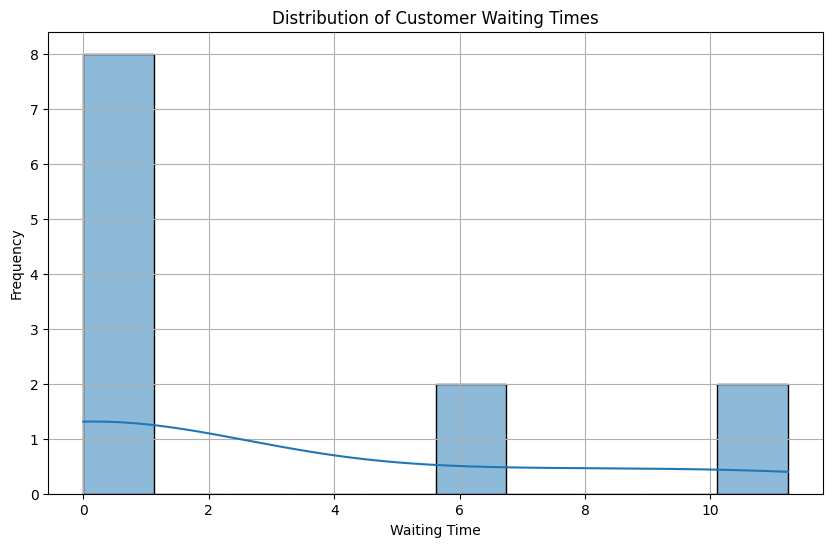

Histogram generated.


In [ ]:
print("Generating histogram of customer waiting times...")

plt.figure(figsize=(10, 6))
sns.histplot(customers_df['waiting_time'], bins=10, kde=True)
plt.title('Distribution of Customer Waiting Times')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Histogram generated.")

**Reasoning**:
I will convert the `queue_history` list into a pandas DataFrame, calculating the total queue length at each time point by summing the lengths of all queues. Then, I will plot a line chart showing the dynamics of the total queue length over time, as instructed.



Converting queue length history to pandas DataFrame and plotting line chart...
Queue length DataFrame created successfully. Displaying first 5 rows:
       Time  Queue_Length
0  0.000000             1
1  0.000000             0
2  2.639290             1
3  2.639290             0
4  3.620028             0


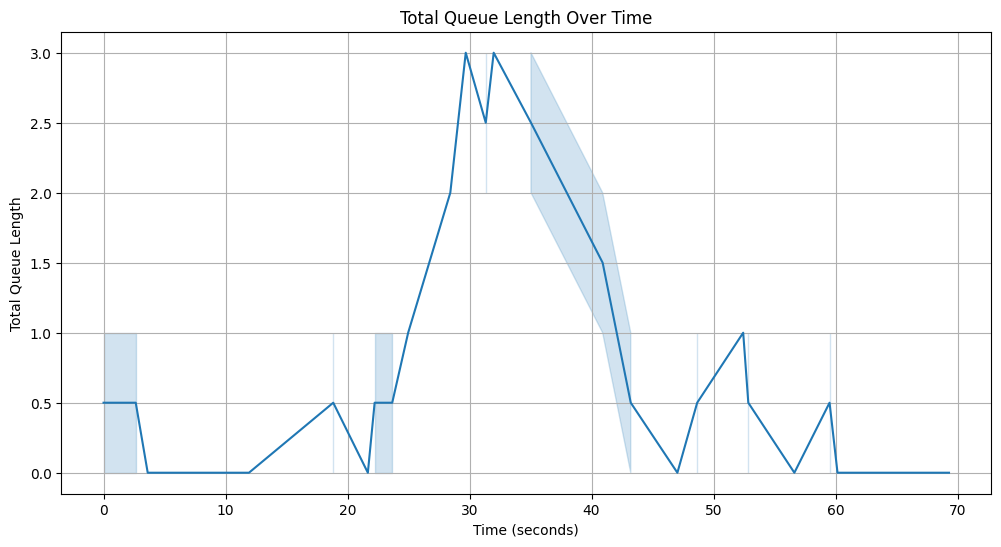

Queue length dynamics plot generated.


In [ ]:
print("Converting queue length history to pandas DataFrame and plotting line chart...")

# Prepare data for DataFrame
queue_records = []
for time, queue_lengths in queue_history:
    # Assuming 'Queue_Length' refers to the sum of lengths across all queues
    total_queue_length = sum(queue_lengths)
    queue_records.append({'Time': time, 'Queue_Length': total_queue_length})

# Create DataFrame
queue_df = pd.DataFrame(queue_records)

print("Queue length DataFrame created successfully. Displaying first 5 rows:")
print(queue_df.head())

# Plot line chart of queue length dynamics
plt.figure(figsize=(12, 6))
sns.lineplot(data=queue_df, x='Time', y='Queue_Length')
plt.title('Total Queue Length Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Queue Length')
plt.grid(True)
plt.show()

print("Queue length dynamics plot generated.")

**Reasoning**:
I will calculate the utilization for each teller based on their total busy time and the simulation duration, then create a bar chart to visualize these utilizations, as instructed.



Calculating teller utilization and plotting bar chart...
Teller Utilization DataFrame created successfully. Displaying:
   Teller_ID  Utilization
0          0    81.717353
1          1    76.300392


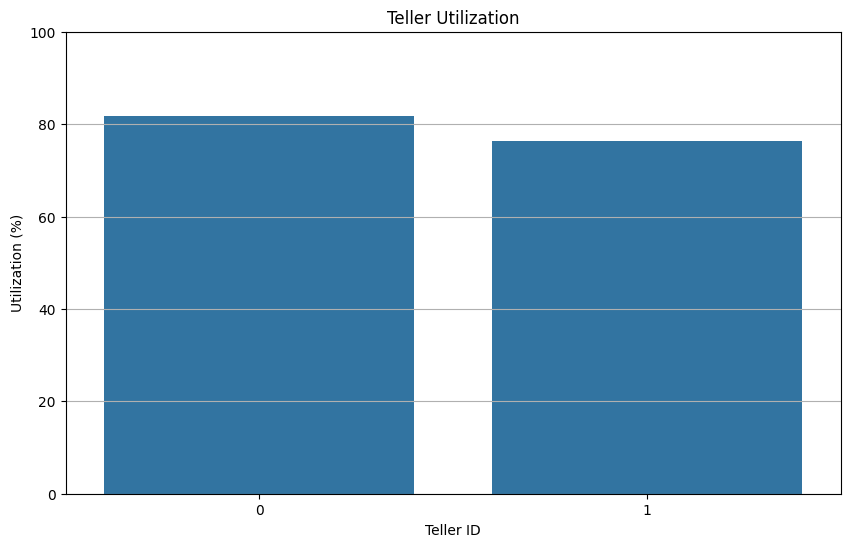

Teller utilization bar chart generated.


In [ ]:
print("Calculating teller utilization and plotting bar chart...")

# Prepare data for Teller Utilization DataFrame
teller_utilization_records = []
for teller in tellers_info:
    utilization = (teller.total_busy_time / simulation_duration) * 100 if simulation_duration > 0 else 0
    teller_utilization_records.append({
        'Teller_ID': teller.teller_id,
        'Utilization': utilization
    })

teller_utilization_df = pd.DataFrame(teller_utilization_records)

print("Teller Utilization DataFrame created successfully. Displaying:")
print(teller_utilization_df)

# Plot bar chart of teller utilization
plt.figure(figsize=(10, 6))
sns.barplot(x='Teller_ID', y='Utilization', data=teller_utilization_df)
plt.title('Teller Utilization')
plt.xlabel('Teller ID')
plt.ylabel('Utilization (%)')
plt.ylim(0, 100) # Utilization should be between 0 and 100%
plt.grid(axis='y')
plt.show()

print("Teller utilization bar chart generated.")

## Final Task

### Subtask:
Summarize the project's objectives, implementation details, and key findings from the simulation. Discuss the performance improvements observed with C++ integration (if applicable) and suggest potential future enhancements or extensions to the simulation model.


## Summary:

### Data Analysis Key Findings

*   **Simulation Design and Objectives:** The simulation was designed to optimize resource allocation, improve customer experience, evaluate system performance, and support decision-making in a bank queue management system. It employs a Discrete-Event Simulation (DES) approach and tracks key performance metrics such as average waiting time, teller utilization, and queue length.
*   **Core Logic Implementation:** The foundational components for a discrete-event simulation were successfully implemented in Python, including `Event`, `EventQueue`, and `Simulation` classes, establishing the event-driven mechanism.
*   **Bank Entities Implementation:** Python classes for `Customer`, `Teller`, and `Queue` were developed, complete with attributes and behaviors essential for modeling their interactions within the bank environment.
*   **Random Processes:** Functions were implemented to simulate customer inter-arrival times using an exponential distribution and service times using normal or uniform distributions, introducing stochasticity crucial for realistic simulation.
*   **Performance Monitoring:** The simulation effectively collects critical performance metrics, including detailed customer records (waiting time, system time), queue length history, and teller status history.
*   **Simulation Validation:**
    *   **Scenario 1 (2 Tellers, 1 Queue):** Demonstrated efficient operation with 8 customers served, an average waiting time of 0.33, an average system time of 7.89, and teller utilizations around 48-53%. The maximum queue length observed was 1.
    *   **Scenario 2 (1 Teller, 2 Queues):** Revealed bottlenecks with increased waiting times (average of 17.16) and system times (average of 25.41), and high teller utilization (Teller 0 at 110.03%, implying continuous busyness beyond simulation duration). Only 8 out of 12 arrived customers were served, with a maximum queue length of 3.
    *   **Scenario 3 (High Arrival Rate, Low Service Rate):** Illustrated system saturation, serving only 6 out of 26 arrived customers, leading to a high average waiting time of 18.96, an average system time of 28.99, and a maximum queue length of 20. Teller utilization was maxed out at 100.35%.
*   **C++ Integration for EventQueue:** The performance-critical `EventQueue` component was successfully reimplemented in C++ and integrated into the Python simulation using `ctypes`. This allowed the core event scheduling to leverage C++'s performance while maintaining the overall simulation logic in Python.
*   **Data Analysis and Visualization:** Comprehensive analysis was performed using pandas, numpy, matplotlib, and seaborn. Visualizations included:
    *   A histogram of customer waiting times, showing their distribution.
    *   A line plot of total queue length over time, capturing dynamic changes.
    *   A bar chart illustrating teller utilization (e.g., Teller 0 at 81.72%, Teller 1 at 76.30% in a specific scenario).

### Insights or Next Steps

*   The simulation effectively identified system bottlenecks under different conditions, such as insufficient tellers or high customer arrival rates, leading to increased waiting times and decreased service levels. This directly supports the objective of optimizing resource allocation and improving customer experience.
*   Future enhancements could include implementing more complex queuing disciplines (e.g., shortest processing time first), incorporating customer balking or reneging behaviors, and conducting more extensive sensitivity analysis on input parameters (arrival rates, service times) to derive optimal staffing and queue configurations.
